## Adding Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
pd.set_option("max_columns",None)


In [2]:
from sklearn.linear_model import LinearRegression  ,Ridge ,Lasso,ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# Understanding Data

In [3]:
df=pd.read_csv("profiles.csv",encoding="latin-1")

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [7]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [8]:
df.shape

(60552, 31)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(9515, 31)

In [11]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [12]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.drop(9514,axis=0,inplace=True)

In [14]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success on here, met so...",you've got something to say. or if there's som...,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [15]:
df.sample(30)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9008,28.0,average,mostly anything,socially,never,graduated from masters program,i am new to the city and i'm looking forward t...,i recently graduated from school and i just mo...,"designing, listening and exploring new places....",is my loud funny laugh. also most people think...,"as for books, i like historical fiction.<br />...","could never do without tracing paper, gps, fam...",my family and friends. i also spend some time ...,"out with friends, we are usually out having di...",that i'm on this website.,there's anything i should know about sf as i a...,hispanic / latin,68.0,-1.0,construction / craftsmanship,2012-06-29-21-58,"san francisco, california",NaN,straight,NaN,christianity,f,NaN,no,"english, spanish",single
4949,23.0,average,strictly anything,rarely,never,graduated from college/university,hey guys! i'm an illustrator who just graduate...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"asian, white",73.0,-1.0,artistic / musical / writer,2012-06-29-18-02,"fairfax, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and dislikes cats,NaN,m,taurus but it doesn&rsquo;t matter,no,"english (fluently), ancient greek (fluently)",single
6758,28.0,average,mostly anything,socially,NaN,graduated from college/university,born and raised in the bay area. i've traveled...,"working as a software engineer, but taking the...","* computer programming (but not ""computers"", i...","curly hair, green eyes.",food: almost anything goes. i'm not into dieta...,friends<br />\nmusic<br />\nstrawberries<br />...,the problems with capitalism and how to overco...,"either at the go kart track in burlingame, out...",the muppet character identify with most strong...,you want to hang out and do things in or near ...,white,66.0,-1.0,computer / hardware / software,2012-06-29-19-39,"san francisco, california",NaN,bisexual,likes dogs and likes cats,agnosticism and laughing about it,m,virgo but it doesn&rsquo;t matter,no,"english (fluently), c++ (okay), spanish (poorly)",single
3822,37.0,average,mostly anything,socially,never,graduated from masters program,NaN,this is a question my mother would ask. i gues...,"sleeping, traveling all over the world (includ...","my laugh (it's supposedly distinctive), quirki...",this question is always so hard because there ...,"dessert, love, a good book, passport, iphone w...","the meaning of life, how to change the corrupt...",there is no typical friday night. in the last ...,what i revealed that i spend a lot of time thi...,"you're funny and silly, have leftist politics,...",asian,63.0,-1.0,other,2012-06-24-13-14,"oakland, california","doesn&rsquo;t have kids, but wants them",straight,NaN,agnosticism but not too serious about it,f,virgo and it&rsquo;s fun to think about,no,"english (fluently), chinese (okay), spanish (p...",single
7620,22.0,average,mostly anything,socially,NaN,working on two-year college,"hi, names tyler i'm a san francisco native. i ...",living the all american dream bar hoping in th...,"being a good security blanket, cooking lol i'm...",my height and i look a lot like prince william...,books:<br />\ncat's cradle<br />\nrainbow six<...,family<br />\nfriends<br />\nmusic<br />\nlake...,how the human race began and why do we exist. ...,snapin necks and cashing checks.,my friends don't know i have a okcuipd account...,you want to get to know a real san francisco n...,"white, other",77.0,-1.0,student,2012-06-29-17-01,"novato, california",doesn&rsquo;t have kids,straight,has dogs and likes cats,christianity and laughing about it,m,capricorn,when drinking,"english (fluently), norwegian (poorly), swedis...",single
754,25.0,skinny,strictly anything,socially,never,working on masters program,"i'm a fun, very easy-going, laid back woman lo...",i am a regional project mana

In [16]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

## Trying to fix and fill null values logically

In [17]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [18]:
df["body_type"].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [19]:
df["body_type"].value_counts()

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [20]:
df["body_type"].fillna("rather not say",inplace=True)

In [21]:
df["drugs"].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [22]:
df['drugs']=np.where(df["drugs"]=="never",1,-1)

In [23]:
df["diet"].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [24]:
df["diet"].replace({"mostly anything":"anything","strictly anything":"anything","mostly vegetarian":"vegetarian","strictly vegetarian":"vegetarian","mostly other":"other","strictly other":"other","mostly vegan":"vegan","strictly vegan":"vegan","mostly kosher":"kosher","strictly kosher":"kosher","mostly halal":"halal","strictly halal":"halal"},inplace=True)

In [25]:
df["diet"].value_counts()

anything      4523
vegetarian     814
other          270
vegan          120
halal           18
kosher          16
Name: diet, dtype: int64

In [26]:
df["drinks"].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [27]:
df["drinks"].value_counts()

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

In [28]:
df["drinks"].fillna("socially",inplace=True)

In [29]:
df["education"].unique() #dummy

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

In [30]:
df["ethnicity"].unique() #dummy

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

In [31]:
df["ethnicity"].value_counts() #dummy

white                                                                5278
asian                                                                 863
hispanic / latin                                                      426
black                                                                 326
other                                                                 319
                                                                     ... 
native american, pacific islander, hispanic / latin, white, other       1
indian, pacific islander                                                1
asian, middle eastern, black                                            1
asian, middle eastern, indian                                           1
middle eastern, hispanic / latin, white, other                          1
Name: ethnicity, Length: 112, dtype: int64

In [32]:
df["ethnicity"].fillna("white",inplace=True)

In [33]:
df["job"].unique() #dummy

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [34]:
df["location"].unique() #dummy

array(['south san francisco, california', 'oakland, california',
       'san francisco, california', 'berkeley, california',
       'belvedere tiburon, california', 'san mateo, california',
       'daly city, california', 'san leandro, california',
       'atherton, california', 'san rafael, california',
       'walnut creek, california', 'menlo park, california',
       'belmont, california', 'san jose, california',
       'palo alto, california', 'emeryville, california',
       'el granada, california', 'castro valley, california',
       'fairfax, california', 'mountain view, california',
       'burlingame, california', 'martinez, california',
       'pleasant hill, california', 'hayward, california',
       'alameda, california', 'vallejo, california',
       'benicia, california', 'el cerrito, california',
       'mill valley, california', 'richmond, california',
       'redwood city, california', 'el sobrante, california',
       'stanford, california', 'san pablo, california',

In [35]:
df["pets"].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [36]:
df["orientation"].unique() #dummy

array(['straight', 'bisexual', 'gay'], dtype=object)

In [37]:
df["religion"].unique() #dummy

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [38]:
df["religion"].replace({"agnosticism but not too serious about it":"agnosticism","agnosticism and laughing about it":"agnosticism","agnosticism and very serious about it":"agnosticism","agnosticism and somewhat serious about it":"agnosticism","catholicism but not too serious about it":"catholicism","catholicism and laughing about it":"catholicism","catholicism and somewhat serious about it":"catholicism","catholicism and very serious about it":"catholicism","atheism but not too serious about it":"atheism","atheism and laughing about it":"atheism","atheism and very serious about it":"atheism","atheism and somewhat serious about it":"atheism","christianity but not too serious about it":"christianity","christianity and laughing about it":"christianity","christianity and somewhat serious about it":"christianity","christianity and very serious about it":"christianity","other but not too serious about it":"other","other and laughing about it":"other","other and very serious about it":"other","other and somewhat serious about it":"other","judaism but not too serious about it":"judaism","judaism and laughing about it":"judaism","judaism and somewhat serious about it":"judaism","judaism and very serious about it":"judaism","hinduism but not too serious about it":"hinduism","hinduism and laughing about it":"hinduism","hinduism and very serious about it":"hinduism","hinduism and somewhat serious about it":"hinduism","islam but not too serious about it":"islam","islam and laughing about it":"islam","islam and somewhat serious about it":"islam","islam and very serious about it":"islam","buddhism but not too serious about it":"buddhism","buddhism and laughing about it":"buddhism","buddhism and somewhat serious about it":"buddhism","buddhism and very serious about it":"buddhism"},inplace=True)

In [39]:
df["religion"].value_counts() #dummy

agnosticism     1381
other           1193
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

In [40]:
df["smokes"].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [41]:
df["smokes"].value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [42]:
df["smokes"].fillna("no",inplace=True)

In [43]:
df["speaks"].nunique() #del

1794

In [44]:
df.drop(["speaks","last_online","income"],axis=1,inplace=True)

In [45]:
df["status"].unique() #dummy

array(['single', 'available', 'seeing someone', 'married'], dtype=object)

In [46]:
df["sign"].unique() #dummy

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [47]:
df["sign"].value_counts() #dummy

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

In [48]:
df["sign"].fillna("None",inplace=True)

In [49]:
df.drop(["offspring","essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"],axis=1,inplace=True)

In [50]:
df.isnull().sum()

age               0
body_type         0
diet           3753
drinks            0
drugs             0
education      1055
ethnicity         0
height            0
job            1331
location          0
orientation       0
pets           3162
religion       3253
sex               0
sign              0
smokes            0
status            0
dtype: int64

In [51]:
df["pets"].fillna("None",inplace=True)

In [52]:
df["diet"].fillna("mostly anything",inplace=True)

In [53]:
df["religion"].value_counts()

agnosticism     1381
other           1193
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

In [54]:
r_values=["agnosticism","other","atheism","christianity","catholicism","judaism","buddhism","hinduism","islam"]
n_values=[1,2,3,4,5,6,7,8,9]

In [55]:
df["religion"].replace({r_values[i]:n_values[i]for i in range(9)} ,inplace=True)

In [56]:
df["religion"].fillna(df.groupby("location")["religion"].transform("median")//1,inplace=True)

In [57]:
df["religion"].fillna(3.0,inplace=True)

In [58]:
df["religion"].replace({n_values[i]:r_values[i]for i in range(9)} ,inplace=True)

In [59]:
df["religion"].value_counts()

atheism         3896
agnosticism     1383
other           1295
christianity    1271
catholicism      780
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

In [60]:
df["job"].value_counts()

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

In [61]:
df["job"].fillna("rather not say",inplace=True)

In [62]:
df["education"].value_counts()

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [63]:
df["education"].value_counts().keys()

Index(['graduated from college/university', 'graduated from masters program',
       'working on college/university', 'working on masters program',
       'graduated from two-year college', 'graduated from high school',
       'graduated from ph.d program', 'graduated from law school',
       'working on two-year college', 'working on ph.d program',
       'dropped out of college/university', 'college/university',
       'graduated from space camp', 'dropped out of space camp',
       'working on space camp', 'graduated from med school',
       'working on law school', 'two-year college', 'working on med school',
       'dropped out of two-year college', 'masters program',
       'working on high school', 'dropped out of ph.d program',
       'dropped out of masters program', 'dropped out of high school',
       'high school', 'space camp', 'ph.d program', 'law school',
       'dropped out of law school', 'dropped out of med school'],
      dtype='object')

In [64]:
df["education"].nunique()

31

In [65]:
r_values=['graduated from college/university', 'graduated from masters program',
       'working on college/university', 'working on masters program',
       'graduated from two-year college', 'graduated from high school',
       'graduated from ph.d program', 'graduated from law school',
       'working on two-year college', 'working on ph.d program',
       'dropped out of college/university', 'college/university',
       'graduated from space camp', 'dropped out of space camp',
       'working on space camp', 'graduated from med school',
       'working on law school', 'two-year college', 'working on med school',
       'dropped out of two-year college', 'masters program',
       'working on high school', 'dropped out of ph.d program',
       'dropped out of masters program', 'dropped out of high school',
       'high school', 'space camp', 'ph.d program', 'law school',
       'dropped out of law school', 'dropped out of med school']
n_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

In [66]:
df["education"].replace({r_values[i]:n_values[i]for i in range(31)} ,inplace=True)

In [67]:
df["education"].fillna(df.groupby("job")["education"].transform("median")//1,inplace=True)

In [68]:
df["education"].replace({n_values[i]:r_values[i]for i in range(31)} ,inplace=True)

In [69]:
df["education"].value_counts()

graduated from college/university    4022
graduated from masters program       2123
working on college/university        1037
working on masters program            251
graduated from two-year college       245
graduated from high school            206
graduated from ph.d program           203
graduated from law school             190
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    9514 non-null   object 
 2   diet         9514 non-null   object 
 3   drinks       9514 non-null   object 
 4   drugs        9514 non-null   int32  
 5   education    9514 non-null   object 
 6   ethnicity    9514 non-null   object 
 7   height       9514 non-null   float64
 8   job          9514 non-null   object 
 9   location     9514 non-null   object 
 10  orientation  9514 non-null   object 
 11  pets         9514 non-null   object 
 12  religion     9514 non-null   object 
 13  sex          9514 non-null   object 
 14  sign         9514 non-null   object 
 15  smokes       9514 non-null   object 
 16  status       9514 non-null   object 
dtypes: float64(2), int32(1), object(14)
memory usage: 1.3+ MB


## Looking to Outliars

In [71]:
df.describe()

,age,drugs,height
count,9514.000000,9514.000000,9514.000000
mean,32.084192,0.255413,68.337398
std,9.445488,0.966883,3.905229
min,18.000000,-1.000000,36.000000
25%,25.000000,-1.000000,66.000000
50%,30.000000,1.000000,68.000000
75%,36.000000,1.000000,71.000000
max,110.000000,1.000000,95.000000


In [72]:
df.corr()["age"]

age       1.000000
drugs     0.131866
height   -0.022078
Name: age, dtype: float64

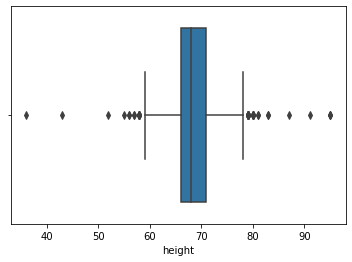

In [73]:
sns.boxplot(df["height"]);

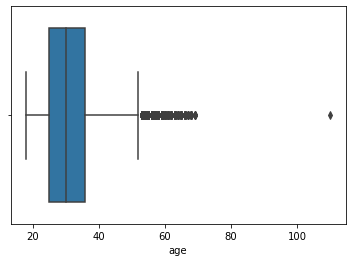

In [74]:
sns.boxplot(df["age"]);

In [75]:
df1=df.copy()

In [76]:
df=df[df["age"]<60]
df=df[df["height"]<80]
df=df[df["height"]>55]

# Prepraing data for spilt

In [77]:
x=df.drop("age",axis=1)
y=df[["age"]]

In [78]:
x=pd.get_dummies(x)

In [79]:
x.shape

(9310, 367)

In [80]:
y.shape

(9310, 1)

# Age Regression 

In [81]:
lr = LinearRegression()
R=Ridge()
L=Lasso()
E=ElasticNet(l1_ratio=0.8)
ETR=ExtraTreeRegressor()
GBR=GradientBoostingRegressor()
KNR=KNeighborsRegressor(n_neighbors=10,weights="uniform")

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [83]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6982, 367), (2328, 367), (6982, 1), (2328, 1))

**LR**

In [84]:
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [85]:
(mean_squared_error(y_pred,y_test))**0.5

3958253104.337325

In [86]:
r2_score(y_test,y_pred)

-2.264606449770279e+17

**ETR**

In [87]:
model=ETR.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [88]:
(mean_squared_error(y_pred,y_test))**0.5

10.348444983372293

In [89]:
r2_score(y_test,y_pred)

-0.5478747223644413

**GBR**

In [90]:
model=GBR.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [91]:
(mean_squared_error(y_pred,y_test))**0.5

7.353093727491461

In [92]:
r2_score(y_test,y_pred)

0.2185056879669255

**KNR**

In [93]:
model=KNR.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [94]:
(mean_squared_error(y_pred,y_test))**0.5

7.887912421619172

In [95]:
r2_score(y_test,y_pred)

0.10068926435140901

I trıed a lot but I couldnt improve my r2_score : (

# Lets go to the clustring

In [96]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [97]:
df1.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,location,orientation,pets,religion,sex,sign,smokes,status
0,22.0,a little extra,anything,socially,1,working on college/university,"asian, white",75.0,transportation,"south san francisco, california",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,single
1,35.0,average,other,often,-1,working on space camp,white,70.0,hospitality / travel,"oakland, california",straight,likes dogs and likes cats,agnosticism,m,cancer,no,single
2,38.0,thin,anything,socially,-1,graduated from masters program,white,68.0,rather not say,"san francisco, california",straight,has cats,atheism,m,pisces but it doesn&rsquo;t matter,no,available
3,23.0,thin,vegetarian,socially,-1,working on college/university,white,71.0,student,"berkeley, california",straight,likes cats,atheism,m,pisces,no,single
4,29.0,athletic,mostly anything,socially,1,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,"san francisco, california",straight,likes dogs and likes cats,atheism,m,aquarius,no,single


In [98]:
df1.shape

(9514, 17)

In [99]:
x=df1

In [100]:
x=pd.get_dummies(x)

In [101]:
model=KMeans(n_clusters=3)#4 tane sınıfa ayırcağınızı söylüyorsunuz

In [102]:
model=model.fit(x)

In [103]:
pred=model.predict(x)

No handles with labels found to put in legend.


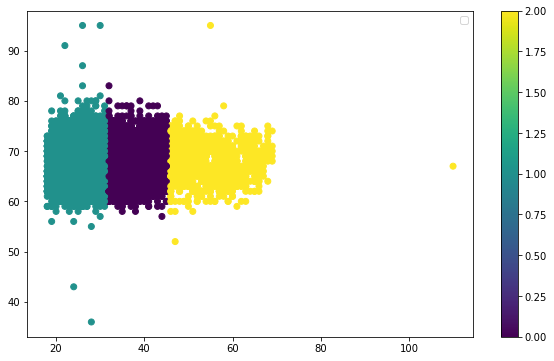

In [104]:
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(x.age,x.height,c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [105]:
x["generation"]=pred#tahminlerimizi Datamız koyuyoruz

In [106]:
x["generation"].replace({0:"Millennial",1:"Gen X-er",2:"Boomers"},inplace=True)

In [107]:
x.head()

,age,drugs,height,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_other,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,education_graduated from college/university,education_graduated from high school,education_graduated from law school,education_graduated from masters program,education_graduated from med school,education_graduated from ph.d program,education_graduated from space camp,education_graduated from two-year college,education_high school,education_law school,education_masters program,education_ph.d program,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college,ethnicity_asian,"ethnicity_asian, black","ethnicity_asian, black, hispanic / latin","ethnicity_asian, black, native american","ethnicity_asian, black, native american, hispanic / latin","ethnicity_asian, black, native american, hispanic / latin, white","ethnicity_asian, black, native american, pacific islander, other","ethnicity_asian, black, native american, pacific islander, white","ethnicity_asian, black, native american, white","ethnicity_asian, black, other","ethnicity_asian, black, pacific islander","ethnicity_asian, black, white","ethnicity_asian, hispanic / latin","ethnicity_asian, hispanic / latin, other","ethnicity_asian, hispanic / latin, white","ethnicity_asian, hispanic / latin, white, other","ethnicity_asian, indian","ethnicity_asian, indian, pacific islander","ethnicity_asian, middle eastern","ethnicity_asian, middle eastern, black","ethnicity_asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white","ethnicity_asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other","ethnicity_asian, middle eastern, indian","ethnicity_asian, middle eastern, indian, hispanic / latin, white, other","ethnicity_asian, middle eastern, white","ethnicity_asian, middle eastern, white, other","ethnicity_asian, native american","ethnicity_asian, native american, hispanic / latin, white","ethnicity_asian, native american, hispanic / latin, white, other","ethnicity_asian, native american, white","ethnicity_asian, native american, white, other","ethnicity_asian, other","ethnicity_asian, pacific islander","ethnicity_asian, pacific islander, hispanic / latin","ethnicity_asian, pacific islander, hispanic / latin, white","ethnicity_asian, pacific islander, other","ethnicity_asian, pacific islander, white","ethnicity_asian, pacific islander, white, other","ethnicity_asian, white","ethnicity_asian, white, other",ethnicity_black,"ethnicity_black, hispanic / latin","ethnicity_black, hispanic / latin, other","ethnicity_black, hispanic / latin, white","ethnicity_black, indian","ethnicity_black, indian, other","ethnicity_black, indian, white","ethnicity_black, native american","ethnicity_black, native american, hispanic / latin","ethnicity_black, native american, hispanic / latin, other","ethnicity_black, native american, hispanic / latin, white","ethnicity_black, native american, hispanic / latin, white, other","ethnicity_black, native american, indian, other","ethnicity_black, native a

No handles with labels found to put in legend.


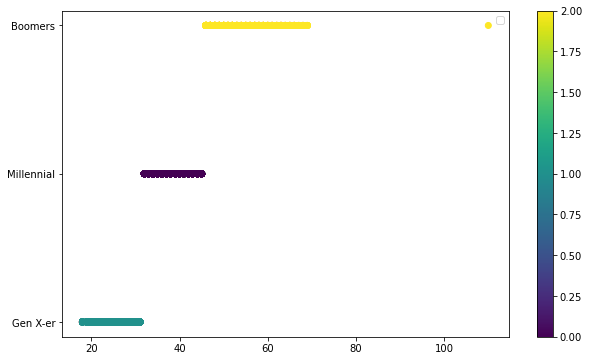

In [108]:
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(x.age,x.generation,c=pred)
plt.legend()
plt.colorbar()
plt.show()